In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
%matplotlib inline

In [ ]:
dt=pd.read_csv("Heart_Disease.csv")

In [ ]:
dt.head()

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,Female,4,130,322,0,2,109,0,2.4,2,3,3,Private,formerly smoked,Yes
1,2,67.0,Male,3,115,564,0,2,160,0,1.6,2,0,7,Self-employed,never smoked,No
2,3,57.0,Female,2,124,261,0,0,141,0,0.3,1,0,7,Private,never smoked,Yes
3,4,64.0,Female,4,128,263,0,0,105,1,0.2,2,1,7,Private,smokes,No
4,5,74.0,Male,2,120,269,0,2,121,1,0.2,1,1,3,Self-employed,never smoked,No


In [ ]:
dt.columns

Index(['id', 'Age', 'Gender', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'work_type', 'smoking_status', 'Heart Disease'],
      dtype='object')

In [ ]:
dt.describe()

,id,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,264.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,135.500000,54.424242,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,78.086491,9.183488,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,1.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,68.250000,47.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,135.500000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,202.750000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,270.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
print(dt.isnull().sum()/dt.shape[0])

id                         0.000000
Age                        0.022222
Gender                     0.022222
Chest pain type            0.000000
BP                         0.000000
Cholesterol                0.000000
FBS over 120               0.000000
EKG results                0.000000
Max HR                     0.000000
Exercise angina            0.000000
ST depression              0.000000
Slope of ST                0.000000
Number of vessels fluro    0.000000
Thallium                   0.000000
work_type                  0.033333
smoking_status             0.022222
Heart Disease              0.000000
dtype: float64


In [ ]:
dt['Age'].fillna(dt['Age'].mean(),inplace=True)
dt['Age']=dt['Age'].astype(int)

In [ ]:
dt['work_type'].fillna(dt['work_type'].mode()[0],inplace=True)

In [ ]:
dt['smoking_status'].fillna(dt['smoking_status'].mode()[0],inplace=True)

In [ ]:
dt['Gender'].fillna(dt['Gender'].mode()[0],inplace=True)

In [ ]:
Q1 = np.percentile(dt['BP'], 25, interpolation = 'midpoint')

<ipython-input-81-0ad6828b69a8>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(dt['BP'], 25, interpolation = 'midpoint')


In [ ]:
Q3 = np.percentile(dt['BP'], 75,interpolation = 'midpoint')

<ipython-input-82-34ce64fd5051>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(dt['BP'], 75,interpolation = 'midpoint')


In [ ]:
IQR = Q3 - Q1

In [ ]:
upper=Q3+1.5*IQR

In [ ]:
#print(upper)

In [ ]:
lower=Q1-1.5*IQR

In [ ]:
#print(lower)

In [ ]:
for x in dt.index :
  if dt.loc[x , "BP"] > 170 :
    dt.loc[x , "BP"] = dt["BP"].mean()

In [ ]:
#dt[117:120]


In [ ]:
#dt.loc[dt['BP'] > 170]

In [ ]:
#dt.columns

In [ ]:
Q1 = np.percentile(dt['Cholesterol'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dt['Cholesterol'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

<ipython-input-92-eb3eb9399dc9>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(dt['Cholesterol'], 25, interpolation = 'midpoint')
<ipython-input-92-eb3eb9399dc9>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(dt['Cholesterol'], 75,interpolation = 'midpoint')


In [ ]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

378.0
114.0


In [ ]:
for x in dt.index :
  if dt.loc[x , "Cholesterol"] > 378 :
    dt.loc[x , "Cholesterol"] = dt["Cholesterol"].mean()

In [ ]:
Q1 = np.percentile(dt['Max HR'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dt['Max HR'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

<ipython-input-95-2220c5d977ea>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(dt['Max HR'], 25, interpolation = 'midpoint')
<ipython-input-95-2220c5d977ea>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(dt['Max HR'], 75,interpolation = 'midpoint')


In [ ]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

215.5
83.5


In [ ]:
dt.loc[dt['Max HR'] < lower]

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
101,102,67,Female,4,120.0,237.0,0,0,71,0,1.0,2,0,3,Govt_job,never smoked,Yes


In [ ]:
for x in dt.index :
  if dt.loc[x , "Max HR"] < lower :
    dt.loc[x , "Max HR"] = dt["Max HR"].mean()

In [ ]:
Q1 = np.percentile(dt['ST depression'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dt['ST depression'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

<ipython-input-99-cd6a1220e539>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(dt['ST depression'], 25, interpolation = 'midpoint')
<ipython-input-99-cd6a1220e539>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(dt['ST depression'], 75,interpolation = 'midpoint')


In [ ]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

4.0
-2.4000000000000004


In [ ]:
dt.loc[dt['ST depression'] > upper]

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
87,88,59,Female,1,131.186461,270.0,0,2,145.0,0,4.2,3,0,7,Private,formerly smoked,No
156,157,55,Female,4,140.000000,217.0,0,0,111.0,1,5.6,3,0,7,Private,smokes,Yes
176,177,51,Female,4,140.000000,298.0,0,0,122.0,1,4.2,2,3,7,Private,never smoked,Yes
235,236,62,Male,4,160.000000,164.0,0,2,145.0,0,6.2,3,3,7,Private,Unknown,Yes


In [ ]:
for x in dt.index :
  if dt.loc[x , "ST depression"] > upper :
   dt.loc[x , "ST depression"] = dt["ST depression"].mean()

In [ ]:
dt.duplicated().sum()

0

In [ ]:
Q1 = np.percentile(dt['Thallium'], 25, interpolation = 'midpoint')
Q3 = np.percentile(dt['Thallium'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

In [ ]:
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR

In [ ]:
dt.loc[dt['Thallium'] < lower]

In [ ]:
leg = LabelEncoder()

dt['Gender'] = leg.fit_transform(dt['Gender'])
dt['work_type']=leg.fit_transform(dt['work_type'])
dt['smoking_status']=leg.fit_transform(dt['smoking_status'])
dt['Heart Disease']=leg.fit_transform(dt['Heart Disease'])


In [ ]:
dt.drop('id' , axis =1 , inplace=True)
dt.drop('Gender',axis=1,inplace=True)
dt.drop('smoking_status',axis=1,inplace=True)
dt.drop('work_type',axis=1,inplace=True)

In [ ]:
dt.corr()

In [ ]:
y = dt['Heart Disease']

In [ ]:
dt.drop('Heart Disease' , axis =1 , inplace = True)

In [ ]:
x = dt

In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int64

In [ ]:
x.head()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,4,130.0,322.000000,0,2,109.0,0,2.4,2,3,3
1,67,3,115.0,249.659259,0,2,160.0,0,1.6,2,0,7
2,57,2,124.0,261.000000,0,0,141.0,0,0.3,1,0,7
3,64,4,128.0,263.000000,0,0,105.0,1,0.2,2,1,7
4,74,2,120.0,269.000000,0,2,121.0,1,0.2,1,1,3


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size=0.2 , random_state=10 )

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression(random_state=1)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  92.5925925925926


In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear', random_state=2)
model.fit(x_train, y_train)


SVC(kernel='linear', random_state=2)

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  92.5925925925926


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion="entropy", random_state=5)
model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=5)

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy*100)

Accuracy:  81.48148148148148


In [ ]:
corr = x.corr()

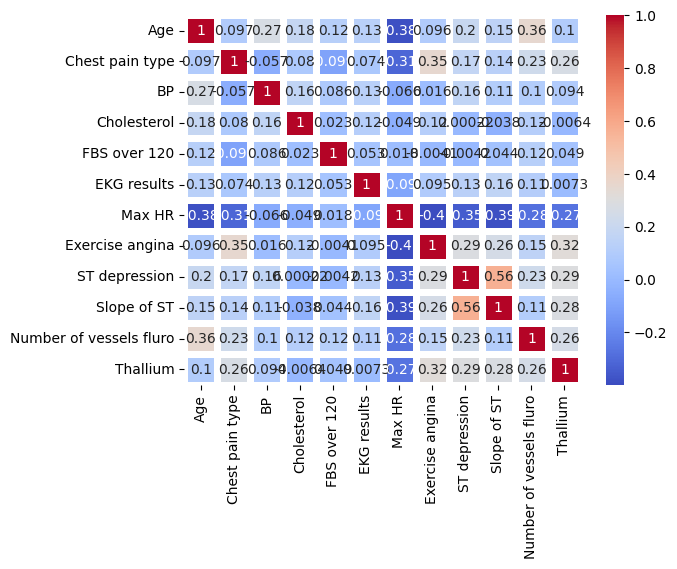

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=5)
plt.show()

In [ ]:
corr.head()

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,0.097167,0.265935,0.182730,0.124696,0.129027,-0.383657,0.095690,0.196663,0.152227,0.355177,0.099782
Chest pain type,0.097167,1.000000,-0.056973,0.079664,-0.098537,0.074325,-0.313528,0.353160,0.171581,0.136900,0.225890,0.262659
BP,0.265935,-0.056973,1.000000,0.163096,0.086294,0.128382,-0.066297,0.015765,0.161343,0.106948,0.104286,0.093617
Cholesterol,0.182730,0.079664,0.163096,1.000000,0.022962,0.118586,-0.048820,0.119512,0.000219,-0.037874,0.119437,-0.006423
FBS over 120,0.124696,-0.098537,0.086294,0.022962,1.000000,0.053499,0.017622,-0.004107,-0.004240,0.044076,0.123774,0.049237


In [ ]:
model = LogisticRegression(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_matrix)

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("Classification report:\n", class_report)

Accuracy: 0.9259259259259259
Confusion matrix:
 [[26  0]
 [ 4 24]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93        26
           1       1.00      0.86      0.92        28

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.94      0.93      0.93        54



In [ ]:
from sklearn.metrics import mean_squared_error


y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.07407407407407407
